# Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Authorization for Hospital Admission Data

The AIH datasets contains data on hospital production and services in Brazil. The data that will be used here is the Authorization for Hospital Admission. This dataset is part of `Brazil’s SIHSUS Hospital Information System`. This system manages the coordination and payment by Brazil’s public healthcare system (covers around 34% of Brazil’s population). In this application, I will be using data from 2015 – 2018. This represents 3.5 years’ of information.

A record in the AIH database is created when a hospital or healthcare unit generates a request for hospitalization. Providers submit demographic and health information about the patient. This request is ultimately approved or rejected. While the patient is in the hospital, the record is updated to also contain information about procedures performed and discharge. 

More information about this data can be found below: 

* [DataSUS Website](http://datasus.saude.gov.br/informacoes-de-saude)
* [AIH Data Fields](https://github.com/IvetteMTapia/Capstone-2_Deep_Learning/blob/master/IT_SIHSUS_1603_DataDict.pdf)

### Upload Data

Upload random sample created from the AIH 2015 - 2018 files.

In [35]:
%%time

AIH_sample_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')

AIH_sample = pd.read_csv(AIH_sample_path, 
                         encoding = 'UTF-8', 
                         na_values= ['NaN',' ',''],
                         low_memory=True)

<string>:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1min 46s, sys: 27.2 s, total: 2min 13s
Wall time: 2min 16s


In [119]:
AIH_sample.index.name = 'index_name'

In [20]:
AIH_sample.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329642 entries, 0 to 8329641
Data columns (total 69 columns):
UF_ZI         8329642 non-null int64
ANO_CMPT      8329642 non-null int64
MES_CMPT      8329642 non-null int64
ESPEC         8329642 non-null int64
CGC_HOSP      6282752 non-null float64
N_AIH         8329642 non-null int64
IDENT         8329642 non-null int64
CEP           8329642 non-null int64
MUNIC_RES     8329642 non-null int64
NASC          8329642 non-null int64
SEXO          8329642 non-null int64
UTI_MES_TO    8329642 non-null int64
MARCA_UTI     8329642 non-null int64
UTI_INT_TO    8329642 non-null int64
DIAR_ACOM     8329642 non-null int64
QT_DIARIAS    8329642 non-null int64
PROC_SOLIC    8329642 non-null int64
PROC_REA      8329642 non-null int64
VAL_SH        8329642 non-null float64
VAL_SP        8329642 non-null float64
VAL_TOT       8329642 non-null float64
VAL_UTI       8329642 non-null float64
US_TOT        8329642 non-null float64
DT_INTER      8329642 no

### Create column blocks

In [6]:
meta = ['UF_ZI','ANO_CMPT','MES_CMPT','CGC_HOSP','N_AIH',
       'IDENT','CEP','NAT_JUR','NATUREZA','GESTAO','MUNIC_MOV',
        'COD_IDADE','SEQ_AIH5','CNAER','VINCPREV','GESTOR_COD',
        'GESTOR_TP','GESTOR_CPF','CNES','SEQUENCIA','HOMONIMO']

pat_charc = ['MUNIC_RES','NASC','SEXO','IDADE','MORTE',
             'NACIONAL','NUM_FILHOS','INSTRU','GESTRISCO','CBOR',
             'RACA_COR','ETNIA']

diag = ['DIAG_PRINC','DIAG_SECUN']

hospi_serv = ['UTI_MES_TO','MARCA_UTI','UTI_INT_TO',
              'DIAR_ACOM','QT_DIARIAS','PROC_SOLIC',
              'PROC_REA','DT_INTER','DT_SAIDA','COBRANCA',
              'IND_VDRL','DIAS_PERM','CONTRACEP1','CONTRACEP2',
              'INSC_PN','CID_ASSO','CID_MORTE','COMPLEX',
              'MARCA_UCI','ESPEC','CAR_INT']


finan = ['VAL_SH','VAL_SP','VAL_TOT','VAL_UTI','US_TOT',
         'FINANC','REGCT','REMESSA', 'VAL_SH_FED',
         'VAL_SP_FED','VAL_SH_GES','VAL_SP_GES','VAL_UCI']


In [7]:
# Sanity check. Make sure I have all the columns accounted for.

col_check = len(meta) + len(pat_charc) + len(diag) + len(hospi_serv) + len(finan)

sample_cols = list(AIH_sample.columns.values)

col_check == len(sample_cols)

True

### Create Dictionary of Variable Definitions for Reference

In [8]:
var_spread_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/IT_SIHSUS_1603_DataDict.xlsx')

var_df = pd.read_excel(var_spread_path, index_col = 'Field_Name')

var_def_dict = var_df.to_dict(orient = 'index')

var_def_dict

{'UF_ZI': {'Type of Field': 'char(6)', 'Description': 'Municipality Manager'},
 'ANO_CMPT': {'Type of Field': 'char(4)',
  'Description': 'Year of AIH processing, in yyyy format.'},
 'MÊS_CMPT': {'Type of Field': 'char(2)',
  'Description': 'Month of AIH processing, in mm format.'},
 'ESPEC': {'Type of Field': 'char(2)', 'Description': 'Specialty of Bed'},
 'CGC_HOSP': {'Type of Field': 'char(14)',
  'Description': 'CNPJ of the Establishment'},
 'N_AIH': {'Type of Field': 'char(13)', 'Description': 'Number of AIH'},
 'IDENT': {'Type of Field': 'char(1)',
  'Description': 'Identification of the type of AIH'},
 'CEP': {'Type of Field': 'char(8)', 'Description': 'CEP of the patient'},
 'MUNIC_RES': {'Type of Field': 'char(6)',
  'Description': "Municipality of Patient's Residence"},
 'NASC': {'Type of Field': 'char(8)',
  'Description': 'Date of birth of the patient (yyyammdd)'},
 'SEXO': {'Type of Field': 'char(1)', 'Description': 'Sex of patient'},
 'UTI_MES_IN': {'Type of Field': 'nume

### Demographics Data Bloc 

> Create demographics dataframe

In [122]:
pat_charc_data = AIH_sample[pat_charc]

pat_charc_data.head(10) 

,MUNIC_RES,NASC,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA
index_name,,,,,,,,,,,,
0,355030,19820321,3,33,0,10,0,0,1,0,3,0
1,530010,20150819,1,0,0,10,0,0,1,0,99,0
2,160030,19850903,3,30,0,10,0,0,1,0,3,0
3,150080,20030209,1,12,0,10,0,0,1,0,3,0
4,315750,19810624,1,34,0,10,0,0,1,0,3,0
5,313630,19980618,3,17,0,10,0,0,1,0,99,0
6,520110,19711120,1,43,0,10,0,0,1,0,3,0
7,230250,19361001,1,79,0,10,0,0,1,0,1,0
8,355370,19500623,3,65,0,10,0,0,1,0,1,0


In [10]:
pat_charc_data.describe()

,MUNIC_RES,NASC,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA
count,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06
mean,3.277015e+05,1.975996e+07,2.171629e+00,3.968477e+01,4.134487e-02,1.015701e+01,2.223409e-02,1.994107e-02,9.990338e-01,3.052517e+01,2.772210e+01,2.537580e-01
std,9.430158e+04,2.450011e+05,9.851618e-01,2.412030e+01,1.990866e-01,3.466309e+00,2.745826e-01,2.288340e-01,3.106855e-02,3.333605e+03,4.276135e+01,6.505445e+00
min,1.100010e+05,1.888030e+07,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.614500e+05,1.956072e+07,1.000000e+00,2.100000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,3.303900e+05,1.979093e+07,3.000000e+00,3.600000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
75%,4.101000e+05,1.995011e+07,3.000000e+00,5.900000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.900000e+01,0.000000e+00
max,5.301800e+05,2.018073e+07,3.000000e+00,9.900000e+01,1.000000e+00,3.500000e+02,6.300000e+01,4.000000e+00,1.000000e+00,8.485100e+05,9.900000e+01,2.640000e+02


**Demographics Bloc Descriptive Findings:** 

+ **MUNIC_RES:** Municipality is coded in k's.
+ **NASC:** This is date of birth. 
+ **SEX:** Coded 1 to 3. 
+ **AGE:** Is a number. Min is 0, Max is 99. 99's are likely missing values representation. 
+ **MORTE:** Indicator of death, 0 or 1. 
+ **NACIONAL:** Nationality, coded 1 to 350.
+ **NUM_FILHOS:** Number of children of the patient.  This is a number. Min 0, Max 63 (this is unlikely to be right). 75th pct is 0. 
+ **INSTRU:** Degree of instruction of the patient (i.e. education level). Min 0, Max 4.
+ **GESTRISCO:** Pregnant at risk indicator. Min 0, Max 1
+ **CBOR:** Occupation of the patient. Min 0, Max 848,510.
+ **RACA_COR:** Race of the patient. Min 0, Max 99. 99's are missing values representation.
+ **ETNIA:** Ethnicity of the patient. Used if race is indigenous. Min 0, Max 264. 

*Question: Where 0's are missing representations?*

#### Data Wrangling of Demographic Bloc

In [120]:
# Convert date of birth to datetime object.

pat_charc_data['NASC'] = pat_charc_data['NASC'].astype('datetime64[ns]')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
# Filter by number of children (greater than 15 children). These are suspect entries

print('Rows with number of children > 20: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] > 20]))

# Replace rows with values greater than 20 with nan's

pat_charc_data.loc[pat_charc_data['NUM_FILHOS'] > 20, 'NUM_FILHOS'] = np.nan

# Check that the rows greater than 20 are 0

print('Rows greater than 20 after replace: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] > 20]))

Rows with number of children > 20:  0
Rows greater than 20 after replace:  0


/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


> Create Plots of Categorical Variables

In [125]:
# Create counts by categories

count_muni = pd.DataFrame(pat_charc_data.MUNIC_RES.value_counts()).reset_index()
count_sexo = pd.DataFrame(pat_charc_data.SEXO.value_counts()).reset_index()
count_morte = pd.DataFrame(pat_charc_data.MORTE.value_counts()).reset_index()
count_instru = pd.DataFrame(pat_charc_data.INSTRU.value_counts()).reset_index()
count_naci = pd.DataFrame(pat_charc_data.NACIONAL.value_counts()).reset_index()
count_gest = pd.DataFrame(pat_charc_data.GESTRISCO.value_counts()).reset_index()
count_cbor = pd.DataFrame(pat_charc_data.CBOR.value_counts()).reset_index()
count_raca = pd.DataFrame(pat_charc_data.RACA_COR.value_counts()).reset_index()
count_etnia = pd.DataFrame(pat_charc_data.ETNIA.value_counts()).reset_index()

Text(0.5,1,'Sex of the Patient')

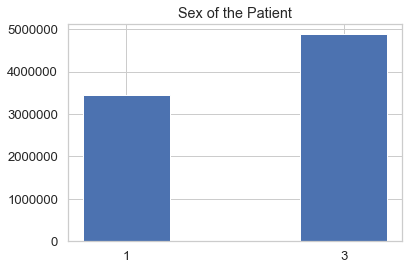

In [136]:
# Sex of the patient 

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_sexo['index'], height = count_sexo.SEXO, tick_label = count_sexo['index'])

plt.title('Sex of the Patient')

Text(0.5,1,'Death Indicator')

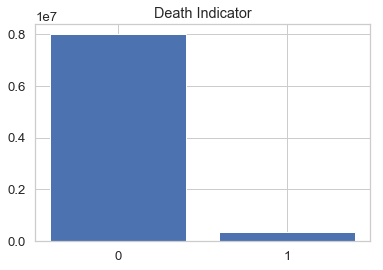

In [140]:
# Death indicator

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_morte['index'], height = count_morte.MORTE, tick_label = count_morte['index'])

plt.title('Death Indicator')

Text(0.5,1,'Instruction Level of the Patient')

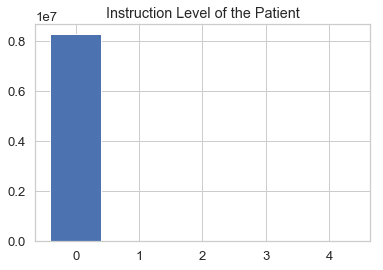

In [142]:
# Instruction Level of the patient (i.e. education level)

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_instru['index'], height = count_instru.INSTRU, tick_label = count_instru['index'])

plt.title('Instruction Level of the Patient')

   index  GESTRISCO
0      1    8321594
1      0       8048


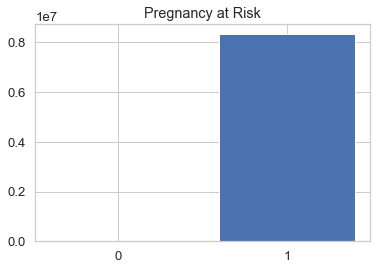

In [147]:
# Pregnancy at risk

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_gest['index'], height = count_gest.GESTRISCO, tick_label = count_gest['index'])

plt.title('Pregnancy at Risk')

print(count_gest)

*Something looks off in this variable.*

For columns with large number of categories extract top twenty rows.

In [193]:
top20_count_muni = count_muni[:20]
top20_count_naci = count_naci[:20]
top20_count_cbor = count_cbor[:20]
top20_count_raca = count_raca[:20]
top20_count_etnia = count_etnia[:20]

(array([100000., 150000., 200000., 250000., 300000., 350000., 400000.,
        450000., 500000., 550000.]), <a list of 10 Text xticklabel objects>)

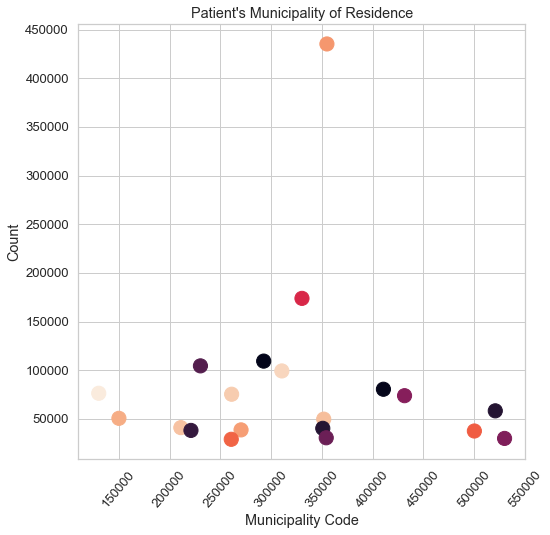

In [187]:
# Plot Top 20 municipalities of patients

colors = np.random.rand(20)

plt.figure(figsize=(8, 8))

plt.scatter(x = top20_count_muni['index'], y = top20_count_muni['MUNIC_RES'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel('Municipality Code')

plt.title("Patient's Municipality of Residence")

plt.xticks(rotation = 50)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text xticklabel objects>)

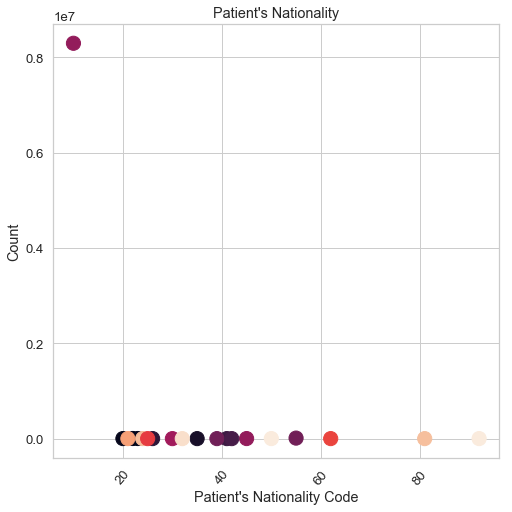

In [189]:
# Plot Top 20 nationalities of patients

colors = np.random.rand(20)

plt.figure(figsize=(8, 8))

plt.scatter(x = top20_count_naci['index'], y = top20_count_naci['NACIONAL'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Nationality Code")

plt.title("Patient's Nationality")

plt.xticks(rotation = 50)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text xticklabel objects>)

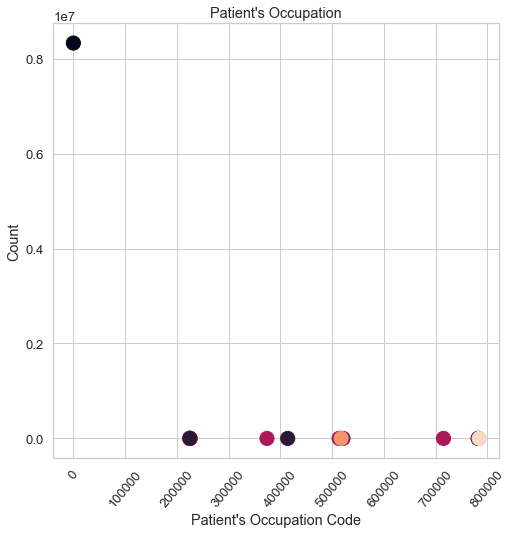

In [190]:
# Plot Top 20 occupations of patients

colors = np.random.rand(20)

plt.figure(figsize=(8, 8))

plt.scatter(x = top20_count_cbor['index'], y = top20_count_cbor['CBOR'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Occupation Code")

plt.title("Patient's Occupation")

plt.xticks(rotation = 50)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

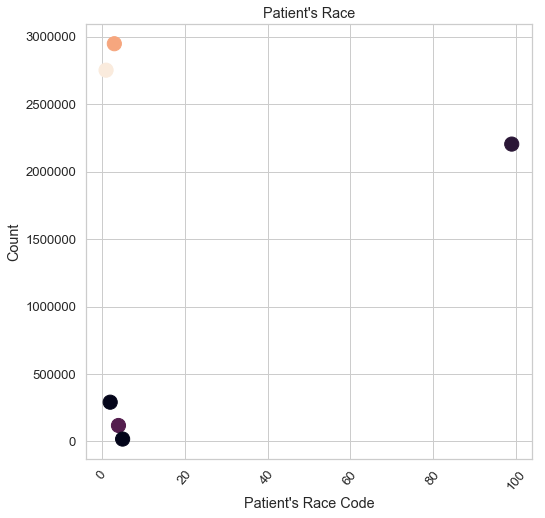

In [195]:
# Plot Race of patients

colors = np.random.rand(6)

plt.figure(figsize=(8, 8))

plt.scatter(x = top20_count_raca['index'], y = top20_count_raca['RACA_COR'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Race Code")

plt.title("Patient's Race")

plt.xticks(rotation = 50)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text xticklabel objects>)

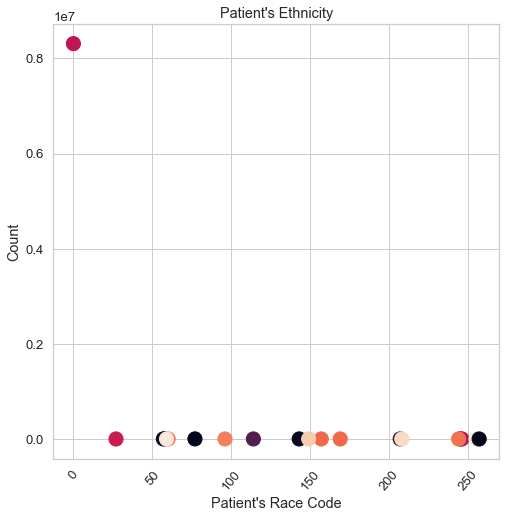

In [199]:
# Plot Top 20 ethnicities of patients

colors = np.random.rand(20)

plt.figure(figsize=(8, 8))

plt.scatter(x = top20_count_etnia['index'], y = top20_count_etnia['ETNIA'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Race Code")

plt.title("Patient's Ethnicity")

plt.xticks(rotation = 50)

> Create plots of Continous Variables

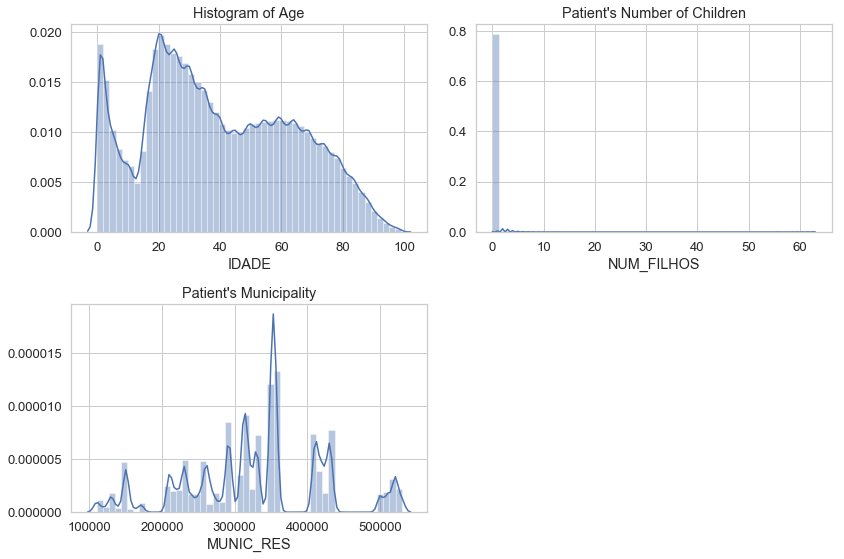

In [186]:
# Plot age variable

plt.subplot(221)

sns.distplot(pat_charc_data.IDADE)

plt.title('Histogram of Age')

# Plot patient's number of children variable

plt.subplot(222)

sns.distplot(pat_charc_data['NUM_FILHOS'].dropna())

plt.title("Patient's Number of Children")

plt.subplot(223)

sns.distplot(pat_charc_data['MUNIC_RES'].dropna())

plt.title("Patient's Municipality")

plt.tight_layout(rect=(2, 2, 4, 4))

> Plot Heat Map of Demographics Features

In [201]:
patient_chara_corr = pat_charc_data.corr()

Text(0.5,1,'Heat Map of Patient Characteristics')

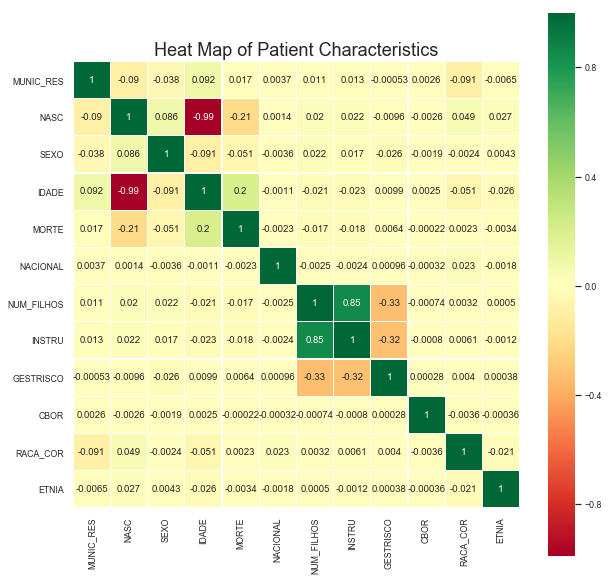

In [202]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=.8)

sns.heatmap(patient_chara_corr, square=True, linewidths=.05, annot=True, cmap='RdYlGn')

plt.title('Heat Map of Patient Characteristics', fontsize = 18)

### Diagnostic Data Bloc  

In [203]:
diag_data = AIH_sample[diag]

In [206]:
diag_data.head(10)

,DIAG_PRINC,DIAG_SECUN
index_name,,
0,O623,0
1,P599,0
2,O800,0
3,S524,0
4,L989,0
5,I10,0
6,S367,0
7,A90,0
8,K299,0


### Hospitalization Services Data Bloc

In [207]:
hospi_serv_data = AIH_sample[hospi_serv]

In [208]:
hospi_serv_data.head(10)

,UTI_MES_TO,MARCA_UTI,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,DT_INTER,DT_SAIDA,COBRANCA,...,DIAS_PERM,CONTRACEP1,CONTRACEP2,INSC_PN,CID_ASSO,CID_MORTE,COMPLEX,MARCA_UCI,ESPEC,CAR_INT
index_name,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,2,303100044,303100044,20150724,20150726,12,...,2,0,0,0,0,0,2,0,3,2
1,0,0,0,3,3,303160047,303160047,20150819,20150822,12,...,3,0,0,0,0,0,2,0.0,7,2
2,0,0,0,2,2,310010039,310010039,20150914,20150916,61,...,2,0,0,0,0,0,2,0,2,2
3,0,0,0,3,3,408020423,408020423,20150307,20150310,12,...,3,0,0,0,0,0,2,0,1,2
4,0,0,0,0,12,401020029,401020029,20151030,20151110,27,...,11,0,0,0,0,0,2,00,1,2
5,0,0,0,7,7,305020048,303060107,20150823,20150830,12,...,7,0,0,0,0,0,2,00,3,2
6,0,0,0,0,6,407030140,407030140,20150703,20150709,12,...,6,0,0,0,0,0,2,0.0,1,2
7,0,0,0,2,2,303010010,303010010,20151216,20151218,12,...,2,0,0,0,0,0,2,0,3,2
8,0,0,0,23,28,303070064,303070064,20151008,20151105,12,...,28,0,0,0,0,0,2,0,3,2


### Financial Data Bloc 

In [210]:
finan_data = AIH_sample[finan]

In [211]:
finan_data.head(10)

,VAL_SH,VAL_SP,VAL_TOT,VAL_UTI,US_TOT,FINANC,REGCT,REMESSA,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI
index_name,,,,,,,,,,,,,
0,168.35,23.99,192.34,0.0,48.44,6,7102,HM35503001N201508.DTS,0.0,0.0,0.0,0.0,0.0
1,247.75,38.79,286.54,0.0,72.17,6,0,HE53000001N201508.DTS,0.0,0.0,0.0,0.0,0.0
2,284.60,241.00,525.60,0.0,136.87,6,0,HE16000001N201510.DTS,0.0,0.0,0.0,0.0,0.0
3,459.06,197.92,656.98,0.0,219.72,6,0,HM15014001N201503.DTS,0.0,0.0,0.0,0.0,0.0
4,363.59,142.60,506.19,0.0,125.29,6,7102,HM31062001N201512.DTS,0.0,0.0,0.0,0.0,0.0
5,203.80,41.87,245.67,0.0,61.88,6,0,HM31480001N201508.DTS,0.0,0.0,0.0,0.0,0.0
6,952.18,196.64,1148.82,0.0,315.60,6,0,HM52011001N201507.DTS,0.0,0.0,0.0,0.0,0.0
7,245.44,58.32,303.76,0.0,75.18,6,0,HM23025001N201512.DTS,0.0,0.0,0.0,0.0,0.0
8,700.02,111.36,811.38,0.0,208.04,6,0,HM35537001N201511.DTS,0.0,0.0,0.0,0.0,0.0


### Identification Information Data Bloc

In [212]:
meta_data = AIH_sample[meta]

In [213]:
meta_data.head(10)

,UF_ZI,ANO_CMPT,MES_CMPT,CGC_HOSP,N_AIH,IDENT,CEP,NAT_JUR,NATUREZA,GESTAO,...,COD_IDADE,SEQ_AIH5,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,CNES,SEQUENCIA,HOMONIMO
index_name,,,,,,,,,,,,,,,,,,,,,
0,355030,2015,8,6.092217e+13,3515115312016,1,4339150,3999,61,1,...,4,0,0,0,0,0,0,2077388,19929,0
1,530000,2015,8,3.947000e+11,5315100954273,1,70335900,1023,40,2,...,2,0,0,0,134,1,69032122134,10464,9501,0
2,160000,2015,10,6.097574e+13,1615100385789,1,68900010,3999,61,2,...,4,0,0,0,0,1,23003952749,2020890,2980,0
3,150140,2015,3,4.938437e+12,1515101116320,1,67010000,2062,20,1,...,4,0,0,0,0,0,0,2332914,1219,0
4,310620,2015,12,1.984393e+13,3115109220069,1,39725000,1147,0,1,...,4,0,0,0,0,1,51841371653,26921,4407,0
5,314800,2015,8,2.334796e+13,3115117350950,1,38770000,2062,20,1,...,4,0,0,0,0,0,0,2196972,922,0
6,520110,2015,7,NaN,5215101323388,1,75083440,1201,40,1,...,4,0,0,0,0,0,0,3771962,4717,0
7,230250,2015,12,NaN,2315107999820,1,63260000,3999,0,1,...,4,0,0,0,0,0,0,2480646,673,0
8,355370,2015,11,7.212721e+13,3515123985241,1,15900000,3999,0,1,...,4,0,0,0,0,0,0,2078295,213,0
